# IFT 4030 / 7030, Machine Learning for Signal Processing, Lab 9

In this lab we will cover material from lecture 10. You will be asked questions related to the material we covered during the lecture.

This lab counts 1% towards your final grade. Each question will be graded in a binary way. If the code works, and follows the requirements you will get full credit, if not no credit will be given. If you are above 50%, you get full points for the whole lab, if below, you will only leave with what you learn. (if you are below 50%, you will get 0% towards your final grade)

This is supposed to individual work. So you are not supposed to collaborate with other students, or copy other people's code. It's okay to talk with others for ideas, but you are supposed write your code individually.

You can use pytorch or numpy. But I recommend that you use pytorch as it will serve you better in the rest of the class!

If you do not have a google (gmail) account, you will not be able run the cells. So get one! Also, make sure you create a local copy, so that you can save your work, and then you can upload your work on teams. After you are happy with your work, upload your work on 'Lab 9' in teams. Have a nice lab!

-----------------------

Dans ce laboratoire, nous couvrirons le matériel du cours 10. Questions vous seront posées liées au matériel que nous avons couvert pendant le cours.

Ce laboratoire compte 1 % dans votre note finale. Chaque question sera notée de manière binaire. Si le code fonctionne et respecte les exigences, vous obtiendrez l'intégralité du crédit, sinon aucun crédit ne sera accordé. Si vous êtes au dessus de 50%, vous obtenez la totalité des points pour l'ensemble du laboratoire, si en dessous, vous ne repartirez qu'avec ce que vous avez appris. (Si vous êtes en dessous de 50%, vous obtiendrez 0% vers votre note finale)

Ceci est censé être un travail individuel. Vous n’êtes donc pas censé collaborer avec d’autres étudiants ni copier le code d’autres personnes. C'est bien de discuter avec les autres pour trouver des idées, mais vous êtes censé écrire votre code individuellement.

Vous pouvez utiliser pytorch ou numpy. Mais je vous recommande d'utiliser pytorch car il vous servira mieux dans le reste de la classe!

Si vous n'avez pas de compte google (gmail), vous ne pourrez pas exécuter les cellules. Alors obtenez-en un! Assurez-vous également de créer une copie locale, afin de pouvoir enregistrer votre travail, puis de télécharger votre travail sur Teams. Une fois que vous êtes satisfait de votre travail, téléchargez votre travail sur 'Lab 9' en teams. Je vous souhaite un beau laboratoire!

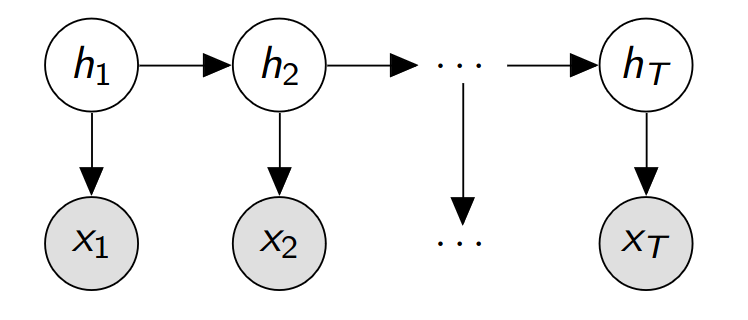

In [19]:
!pip install hmmlearn

DEPRECATION: Loading egg at c:\python311\lib\site-packages\mir-1.0.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Q1 Dynamic Time Warping (50pt)

## Q1.a Implement Dynamic Time Warping and test it on a small input. (30pt)

Implement the Dynamic Time Warping algorithm we discussed in class, using the recursion defined in slide 9.

I give a template for an iterative solution, but if you wish you can do it with a recursion also. Then plot the Pairwise Distance Matrix, Dynamic Time Warping Cost matrix, and the optimal path, as we do in slide 12.

# Q1 Déformation temporelle dynamique (50 pt)

## Q1.a Implémentez Dynamic Time Warping et testez-le sur une petite entrée. (30pts)

Implémentez l'algorithme Dynamic Time Warping dont nous avons discuté en classe, en utilisant la récursivité définie dans la diapositive 9.

Je donne un modèle pour une solution itérative, mais si vous le souhaitez, vous pouvez également le faire avec une récursivité. Tracez ensuite la matrice de distance par paire, la matrice de coût de déformation dynamique du temps et le chemin optimal, comme nous le faisons dans la diapositive 12.


[[ 1.  5. 21. 37. 62.]
 [ 2.  1.  5.  9. 18.]
 [ 3.  1.  5.  9. 18.]
 [12.  5.  1.  1.  2.]
 [11.  9.  1.  1.  2.]]
[[0 0]
 [1 1]
 [2 1]
 [3 2]
 [3 3]
 [4 4]]


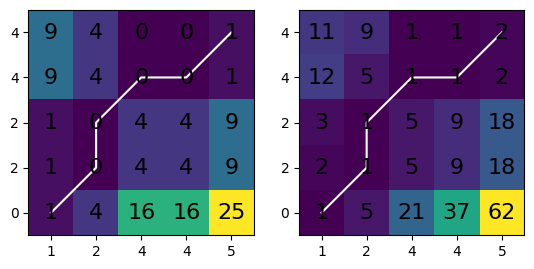

In [20]:
import numpy as np
import matplotlib.pyplot as plt

bt_moves = [(-1, -1), (-1, 0), (0, -1)]
def dtw(x, y):
    n = x.shape[0]
    m = y.shape[0]

    C = np.zeros((n, m))

    # Initialization
    for i in range(0, n):
        for j in range(0, m):
            C[i, j] = np.inf

   # Main loop
    for i in range(n):
        for j in range(m):
            dist = (x[i] - y[j])**2
            if i == 0 and j == 0:
                C[i, j] =   dist
            else:
                C[i, j] = dist + min(C[i-1, j-1], C[i-1, j], C[i, j-1])

    # do the back tracking
    traj = [(n-1, m-1)]
    while traj[0][0] != 0 or traj[0][1] != 0:
      # not handling the edge cases super well, but that's fine for these inputs
      choices = [C[traj[0][0]-1, traj[0][1]-1], C[traj[0][0]-1, traj[0][1]], C[traj[0][0], traj[0][1]-1], ]
      ind_argmin = np.argmin(choices)
      traj.insert(0, (traj[0][0] + bt_moves[ind_argmin][0], traj[0][1] + bt_moves[ind_argmin][1]))
    return np.sqrt(C[n-1, m-1]), C, traj

x = np.array([0, 2, 2, 4, 4])
y = np.array([1, 2, 4, 4, 5])

# calculate the pairwise distance matrix
D = np.zeros((x.shape[0], y.shape[0]))
for i in range(x.shape[0]):
    for j in range(y.shape[0]):
        D[i, j] = (x[i] - y[j])**2


cst, C, traj = dtw(x, y)
traj = np.array(traj)
print(C)
print(traj)

# compute the pairwise distances
plt.subplot(121)
plt.imshow(D, origin='lower')
plt.yticks(range(x.shape[0]), x)
plt.xticks(range(y.shape[0]), y)
plt.plot(traj[:, 1], traj[:, 0], 'w')

min_val, max_val = 0, 5
ind_array = np.arange(min_val + 0.0, max_val + 0.0, 1.0)
xs, ys = np.meshgrid(ind_array, ind_array)

for i, (x_val, y_val) in enumerate(zip(xs.flatten(), ys.flatten())):
    plt.text(x_val, y_val, int(D[int(y_val+0.5), int(x_val+0.5)]), va = 'center', ha='center', fontsize=16)

plt.subplot(122)
plt.imshow(C, origin='lower')
plt.yticks(range(x.shape[0]), x)
plt.xticks(range(y.shape[0]), y)
plt.plot(traj[:, 1], traj[:, 0], 'w')

min_val, max_val = 0, 5
ind_array = np.arange(min_val + 0.0, max_val + 0.0, 1.0)
xs, ys = np.meshgrid(ind_array, ind_array)

for i, (x_val, y_val) in enumerate(zip(xs.flatten(), ys.flatten())):
    plt.text(x_val, y_val, int(C[int(y_val+0.5), int(x_val+0.5)]), va = 'center', ha='center', fontsize=16)


## Q1b. Try your DTW function on sinusoids (20pt)

Run the DTW function you have implemented above on the two sine functions we have shown on slide 10. (I provide the sine functions below).

Do the same plot we show on slide 10. (The distance function as `imshow()`, and then the optimal path in between as we see in the slide. )

Plot the two sine functions after warping also.

## Q1b. Essayez votre fonction DTW sur les sinusoïdes (20pt)

Exécutez la fonction DTW que vous avez implémentée ci-dessus sur les deux fonctions sinusoïdales que nous avons présentées sur la diapositive 10. (Je fournis les fonctions sinusoïdales ci-dessous).

Faites le même tracé que celui que nous montrons sur la diapositive 10. (La distance fonctionne comme `imshow()`, puis le chemin optimal entre les deux, comme nous le voyons dans la diapositive. )

Tracez également les deux fonctions sinusoïdales après la déformation.

Text(0.5, 1.0, 'Signal 2 after warping')

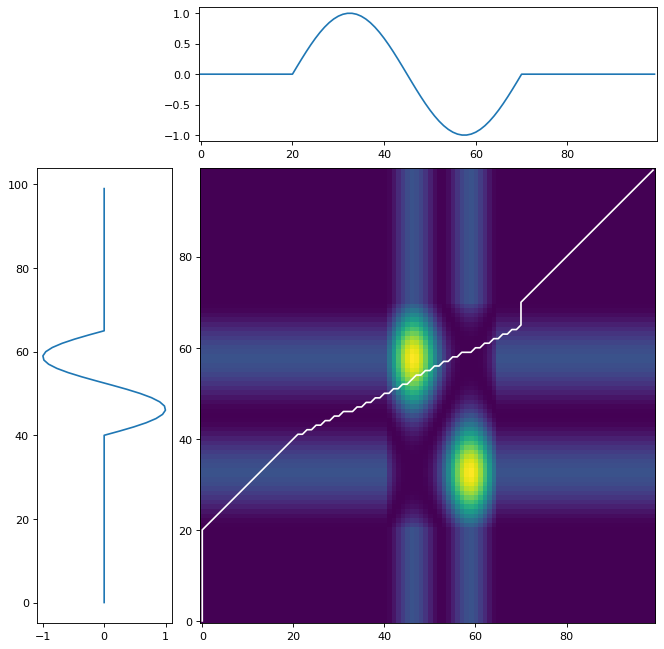

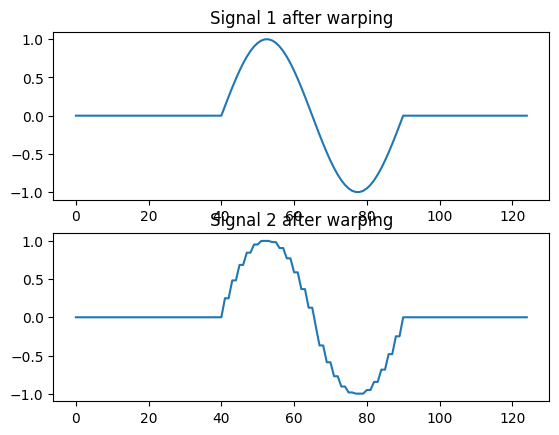

In [21]:
sig1 = np.zeros((100,))
sig1[20:70] = np.sin(2*np.pi*np.arange(50)/50)

sig2 = np.zeros((100, ))
sig2[40:65] = np.sin(2*np.pi*np.arange(25)*(2/50))

cst, C, traj = dtw(sig1, sig2)
traj = np.array(traj)

D = np.zeros((sig1.shape[0], sig2.shape[0]))
for i in range(sig1.shape[0]):
    for j in range(sig2.shape[0]):
        D[i, j] = (sig1[i] - sig2[j])**2

plt.figure(figsize=[10, 10], dpi=80)
ax = plt.subplot2grid((4, 4), (0, 1), rowspan=1, colspan=3)
ax.plot(sig1)

plt.subplot2grid((4, 4), (1, 0), rowspan=3, colspan=1)
plt.plot(sig2, np.arange(100) )

plt.subplot2grid((4, 4), (1, 1), rowspan=3, colspan=3, sharex=ax)
plt.imshow(D, origin='lower')
plt.plot(traj[:, 0], traj[:, 1], 'w')

plt.figure()
plt.subplot(211)
plt.plot(sig1[traj[:, 0]])
plt.title('Signal 1 after warping')

plt.subplot(212)
plt.plot(sig2[traj[:, 1]])
plt.title('Signal 2 after warping')


# Q2 Hidden Markov Models and all that

## Q2.a Generate Data from an HMM (30pt)

Using the transition matrix we defined in lab2, generate the hidden chain.
That is,
$$p(h_{t+1}=i | h_t = j) = 1-\epsilon, \; \text{for}  \; \; i = j,$$
$$p(h_{t+1}=mod(i+1, 3) | h_t = i) =\epsilon,$$
$$p(h_{t+1}= i | h_t = j) = 0, \; otherwise.$$

Use 3 states, $\epsilon=0.05$ so the transition matrix will of size 3. Once the hidden chain is generated, generate 1D observed Data from Gaussian distributions such that, the Gaussian that corresponds to state $k$ is,

$$ p(x_t | h_t =k) = \mathcal N(x_t; \mu_k, \sigma^2).$$

Use $\mu_1 = -2, \mu_2 = 0, \mu_3 =2$, $\sigma=0.1$.

Organize this as a python function. Generate a sequence with length $T=200$. Use uniform distribution for $p(h_0)$.

Hint: You can use `np.random.choice()` to sample from a discrete distribution.

Plot the latent states, and the observations.

# Q2. Modèles de Markov cachés et tout ça

## Q2.a Générer des données à partir d'un HMM (30 pt)

À l'aide de la matrice de transition que nous avons définie dans l'atelier 2, générez la chaîne cachée.
C'est,
$$p(h_{t+1}=i | h_t = j) = 1-\epsilon, \; \text{pour} \; \; i = j,$$
$$p(h_{t+1}=mod(i+1, 3) | h_t = i) =\epsilon,$$
$$p(h_{t+1}= i | h_t = j) = 0, \; sinon.$$

Utilisez 3 états, $\epsilon=0.05$ pour que la matrice de transition soit de taille 3. Une fois la chaîne cachée générée, générez des données observées 1D à partir de distributions gaussiennes telles que la gaussienne qui correspond à l'état $k$ est,

$$ p(x_t | h_t =k) = \mathcal N(x_t; \mu_k, \sigma^2).$$

Utilisez $\mu_1 = -2, \mu_2 = 0, \mu_3 =2$, $\sigma=0.1$.

Organisez-le comme une fonction python. Générez une séquence de longueur $T=200$. Utilisez une distribution uniforme pour $p(h_0)$.

Astuce : vous pouvez utiliser `np.random.choice()` pour échantillonner à partir d'une distribution discrète.

Tracez les états latents et les observations.


<StemContainer object of 3 artists>

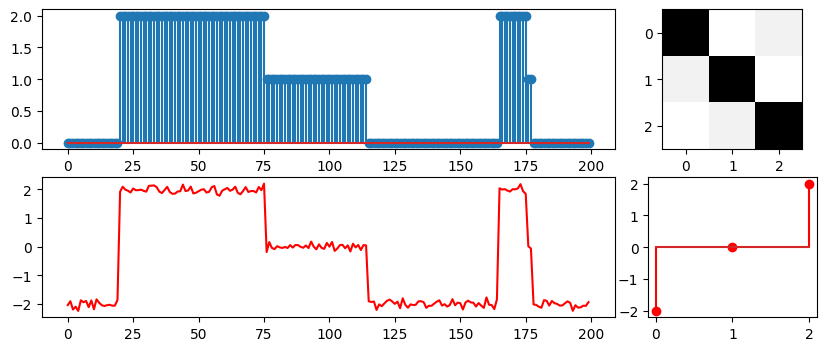

In [22]:
np.random.seed(2)
def generate_hmmdata(A, mu, sigma=0.1, T=200):
  # p_initial = np.ones(A.shape[0])/A.shape[0]
  initial_state = np.random.choice(A.shape[0])	
  all_hs = [initial_state]
  for t in range(1,T):
    if t == 0:
      all_hs.append(np.random.choice(A.shape[0]))
    else:
      all_hs.append(np.random.choice(A.shape[0], p=A[all_hs[-1], :]))

  all_hs = np.array(all_hs)
  obs = mu[all_hs] + np.random.randn(T)*sigma
  return obs, all_hs

E = np.eye(3)
eps = 0.05

A = E*(1-eps) + np.concatenate([E[-1,:].reshape(1, -1), E[:2, :]], axis=0)*eps
mu = np.array([-2, 0, 2])

obs, hs = generate_hmmdata(A, mu)

plt.figure(figsize=[10, 4], dpi=100)

plt.subplot2grid((2, 4), (0, 0), rowspan=1, colspan=3)
plt.stem(hs)

plt.subplot2grid((2,4), (1, 0), rowspan=1, colspan=3)
plt.plot(obs, 'r')

plt.subplot2grid((2, 4), (0, 3), rowspan=1, colspan=1)
plt.imshow(A, cmap='gray_r')

plt.subplot2grid((2, 4), (1, 3), rowspan=1, colspan=1)
plt.stem(mu, 'r')


## Q2.b HMM Fitting and evaluation (20pt)

First generate data using a uniform transition matrix, and the same emission matrix as above, plot the data.  

Then, we will fit an HMM to the data we generated in Q2.a, and another HMM to the data we will generate in this question.

We will then calculate the model likelihoods $p(x_{1:T})$ under both models, of both sequences. Do we see larger likelihood for the correct class?

We will use the python `hmmlearn` toolkit to do this

## Q2.b Apprentissage d'un HMM et l'évaluation (20pt)

Générez d’abord des données en utilisant une matrice de transition uniforme et la même matrice d’émission que ci-dessus, tracez les données.

Ensuite, nous adapterons un HMM aux données que nous avons générées au Q2.a, et un autre HMM aux données que nous générerons dans cette question.

Nous calculerons ensuite les vraisemblances du modèle $p(x_{1:T})$ sous les deux modèles, des deux séquences. Voyons-nous une plus grande probabilité pour la bonne classe ?

Nous utiliserons la boîte à outils python `hmmlearn` pour ce faire

         1    -546.91166042             +nan
         2    -180.72880867    +366.18285175
         3     -90.12588040     +90.60292827
         4     -89.82129447      +0.30458593
         5     -89.44672942      +0.37456505
         6     -88.94263292      +0.50409650
         7     -88.42013886      +0.52249406
         8     -88.01270271      +0.40743616
         9     -87.75475056      +0.25795215
        10     -87.60491587      +0.14983468
         1    -396.37660170             +nan
         2    -377.62619056     +18.75041114
         3    -371.66090823      +5.96528233
         4    -357.66084426     +14.00006398
         5    -296.57665372     +61.08419053
         6    -258.44816742     +38.12848630
         7    -239.79033812     +18.65782930
         8    -204.66083312     +35.12950501
         9    -143.50367290     +61.15716021
        10     -90.41199802     +53.09167489


[[ -475.35591644 -1290.51925078]
 [ -304.47238098  -311.4545001 ]]


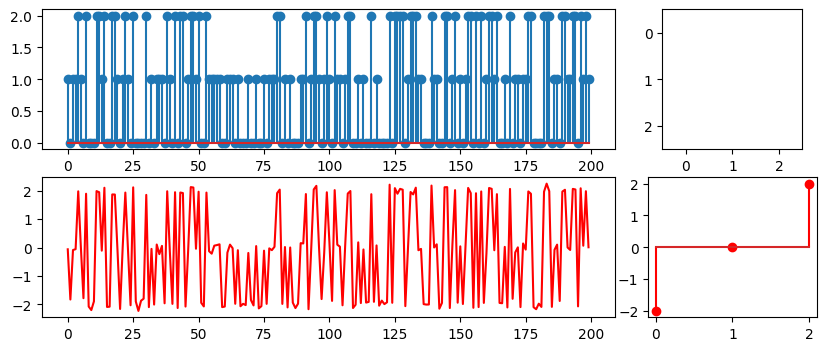

In [23]:
np.random.seed(10)
A2 = np.ones((3, 3))/3
mu = np.array([-2, 0, 2])

obs2, hs2 = generate_hmmdata(A2, mu)

plt.figure(figsize=[10, 4], dpi=100)

plt.subplot2grid((2, 4), (0, 0), rowspan=1, colspan=3)
plt.stem(hs2)

plt.subplot2grid((2,4), (1, 0), rowspan=1, colspan=3)
plt.plot(obs2, 'r')

plt.subplot2grid((2, 4), (0, 3), rowspan=1, colspan=1)
plt.imshow(A2, cmap='gray_r')

plt.subplot2grid((2, 4), (1, 3), rowspan=1, colspan=1)
plt.stem(mu, 'r')

import hmmlearn.hmm as hmm
hmm1 = hmm.GaussianHMM(n_components=3, verbose=True)
hmm1.fit(obs.reshape(-1, 1)) # you need to feed an object of size T x 1 -- on obs

hmm2 = hmm.GaussianHMM(n_components=3, verbose=True)
hmm2.fit(obs2.reshape(-1, 1))  # on obs2

## generate test data from the first HMM, use T=500
obs_hmm1_test, _ = generate_hmmdata(A, mu, T=500)

## generate test data from the second HMM, use T=500
obs_hmm2_test, _ = generate_hmmdata(A2, mu, T=500)

## calculate the scores of both sequences under both models
scores = np.zeros((2,2))
scores[0, 0] = hmm1.score(obs_hmm1_test.reshape(-1, 1))
scores[0, 1] = hmm1.score(obs_hmm2_test.reshape(-1, 1))

scores[1, 0] = hmm2.score(obs_hmm1_test.reshape(-1, 1))
scores[1, 1] = hmm2.score(obs_hmm2_test.reshape(-1, 1))

print(scores)

## Q2.c Implement the HMM forward pass (Bonus)

This is a bonus question. Repeat the scoring part of Q2.b with your own implementation of HMM forward pass.

If you do everything correctly until this point, and can implement an HMM forward pass yourself, we will give you 200 pt for this lab.

However, we will not answer any question regarding this question. You are completely on your own. Good luck !!

## Q2.c Implémenter la passe avant HMM (Bonus)

C'est une question bonus. Répétez la partie scoring de Q2.b avec votre propre implémentation de passe avant HMM.

Si vous faites tout correctement jusqu'à présent et que vous pouvez implémenter vous-même une passe avant HMM, nous vous donnerons 200 pts pour cet atelier.

Cependant, nous ne répondrons à aucune question concernant cette question. Vous êtes complètement seul.e. Bonne chance !!